<a href="https://colab.research.google.com/github/gtbnhyujmj2003/Aidea-AOI/blob/master/%5BAidea%5D%5BAOI%5D%5B04%5D%20VGG16%20-%20%5BFinal%20Ver.Elwing%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# 因為圖片實在太多，所以要用壓縮檔載入

import zipfile

f = zipfile.ZipFile("./drive/My Drive/AOI/train_images.zip")
f.extractall("./datasets")

In [0]:
# 創造資料夾

import os

for class_num in range(6):
  DATASET_PATH_TRAIN = '/content/train_images/'
  DATASET_PATH_TEST = '/content/test_images/'

  # exist_ok：只有在目录不存在时创建目录，目录已存在时不会抛出异常。
  os.makedirs(DATASET_PATH_TRAIN + str(class_num), exist_ok=True)
  os.makedirs(DATASET_PATH_TEST + "test", exist_ok=True)

In [0]:
# 設計函數

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

def IMG_VGG16_preprocessed (Paths, AnswerCSV):
  # folderName and fileName
  
  ImageAnswer = AnswerCSV

  AA = Paths.split("/")[-1]
  BB = ImageAnswer[ImageAnswer["ID"] == AA]["Label"]
  ID = BB.values[0]

  fileName = AA
  folderName = ID
  
  # 圖片用VGG16預處理
  img = load_img(Paths)
  img_npm = np.array(img)
  img_pre = preprocess_input(img_npm)
  VGGED_IMG = np.array(img_pre)
  VGGED_IMG = VGGED_IMG / 255.0  # 直接除255.0

  # 存檔
  NewPaths = "/content/train_images/" + str(folderName) + "/" + str(fileName)
  cv2.imwrite(NewPaths, VGGED_IMG)

In [0]:
import pandas as pd
from glob import glob

Paths = glob('/content/datasets/train_images/*')
AnswerCSV = pd.read_csv("./drive/My Drive/AOI/train.csv")

for Paths in Paths:
  IMG_VGG16_preprocessed(Paths, AnswerCSV)

In [0]:
# Generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator
Generator = ImageDataGenerator(rescale= 1. * 255.0,
                               validation_split=0.2)

In [6]:
TrainFlowGenerator = Generator.flow_from_directory(
    directory = "/content/train_images/",
    target_size = (224, 224),
    class_mode = 'categorical')

Found 2528 images belonging to 6 classes.


In [7]:
# cnn = VGG16

from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, GlobalAveragePooling2D

cnn = VGG16(include_top=False, input_shape=(224, 224, 3))

for l in cnn.layers:
    l.trainable = False

x = BatchNormalization()(cnn.output)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(512, activation="relu")(x)
x = Dense(64, activation="relu")(x)
out = Dense(6, activation="softmax")(x)

model = Model(inputs=cnn.input, outputs=out)
# model.summary()

58892288/58889256 [==============================] - 2s 0us/step


In [0]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'],)

In [9]:
# 感謝上帝，這裡是模型。
from keras.callbacks import EarlyStopping

# EarlyStopping = EarlyStopping(monitor='val_loss', patience=50)

# 2528/32 = 79
model.fit(TrainFlowGenerator, epochs=100, verbose=3, 
          # callbacks=[EarlyStopping],
         )

Using TensorFlow backend.


Epoch 98/100
Epoch 99/100
Epoch 100/100


In [0]:
# 載入 真．驗證資料
import zipfile

f = zipfile.ZipFile("./drive/My Drive/AOI/test_images.zip")
f.extractall("./datasets_test/")

In [0]:
for Paths in glob('/content/datasets_test/test_images/*'):
  # fileName
  fileName = Paths.split("/")[-1]

  # 圖片用VGG16預處理
  img = load_img(Paths)
  img_npm = np.array(img)
  img_pre = preprocess_input(img_npm)
  VGGED_IMG = np.array(img_pre)
  VGGED_IMG = VGGED_IMG / 255.0  # 直接除255.0

  # 存檔
  NewPaths = "/content/test_images/test/" + str(fileName)
  cv2.imwrite(NewPaths, VGGED_IMG)

In [12]:
TestFlowed = Generator.flow_from_directory(
    directory = "/content/test_images/",
    target_size= (224, 224),
    batch_size= 100,)

Found 10142 images belonging to 1 classes.


In [13]:
predict = model.predict(TestFlowed, verbose=2).argmax(axis=-1)
predict.shape

102/102 - 49s


(10142,)

In [0]:
# 預言文件

import pandas as pd

df2 = pd.read_csv("./drive/My Drive/AOI/test.csv")
df2 = df2.drop(["Label"], axis=1)

df9 = pd.DataFrame({"Label":predict})

result = pd.concat([df2, df9], axis=1) 
# result

In [0]:
# 存檔 上傳Aidea 拿成績
result.to_csv("/content/drive/My Drive/Result.csv", encoding="UTF8", index=False)

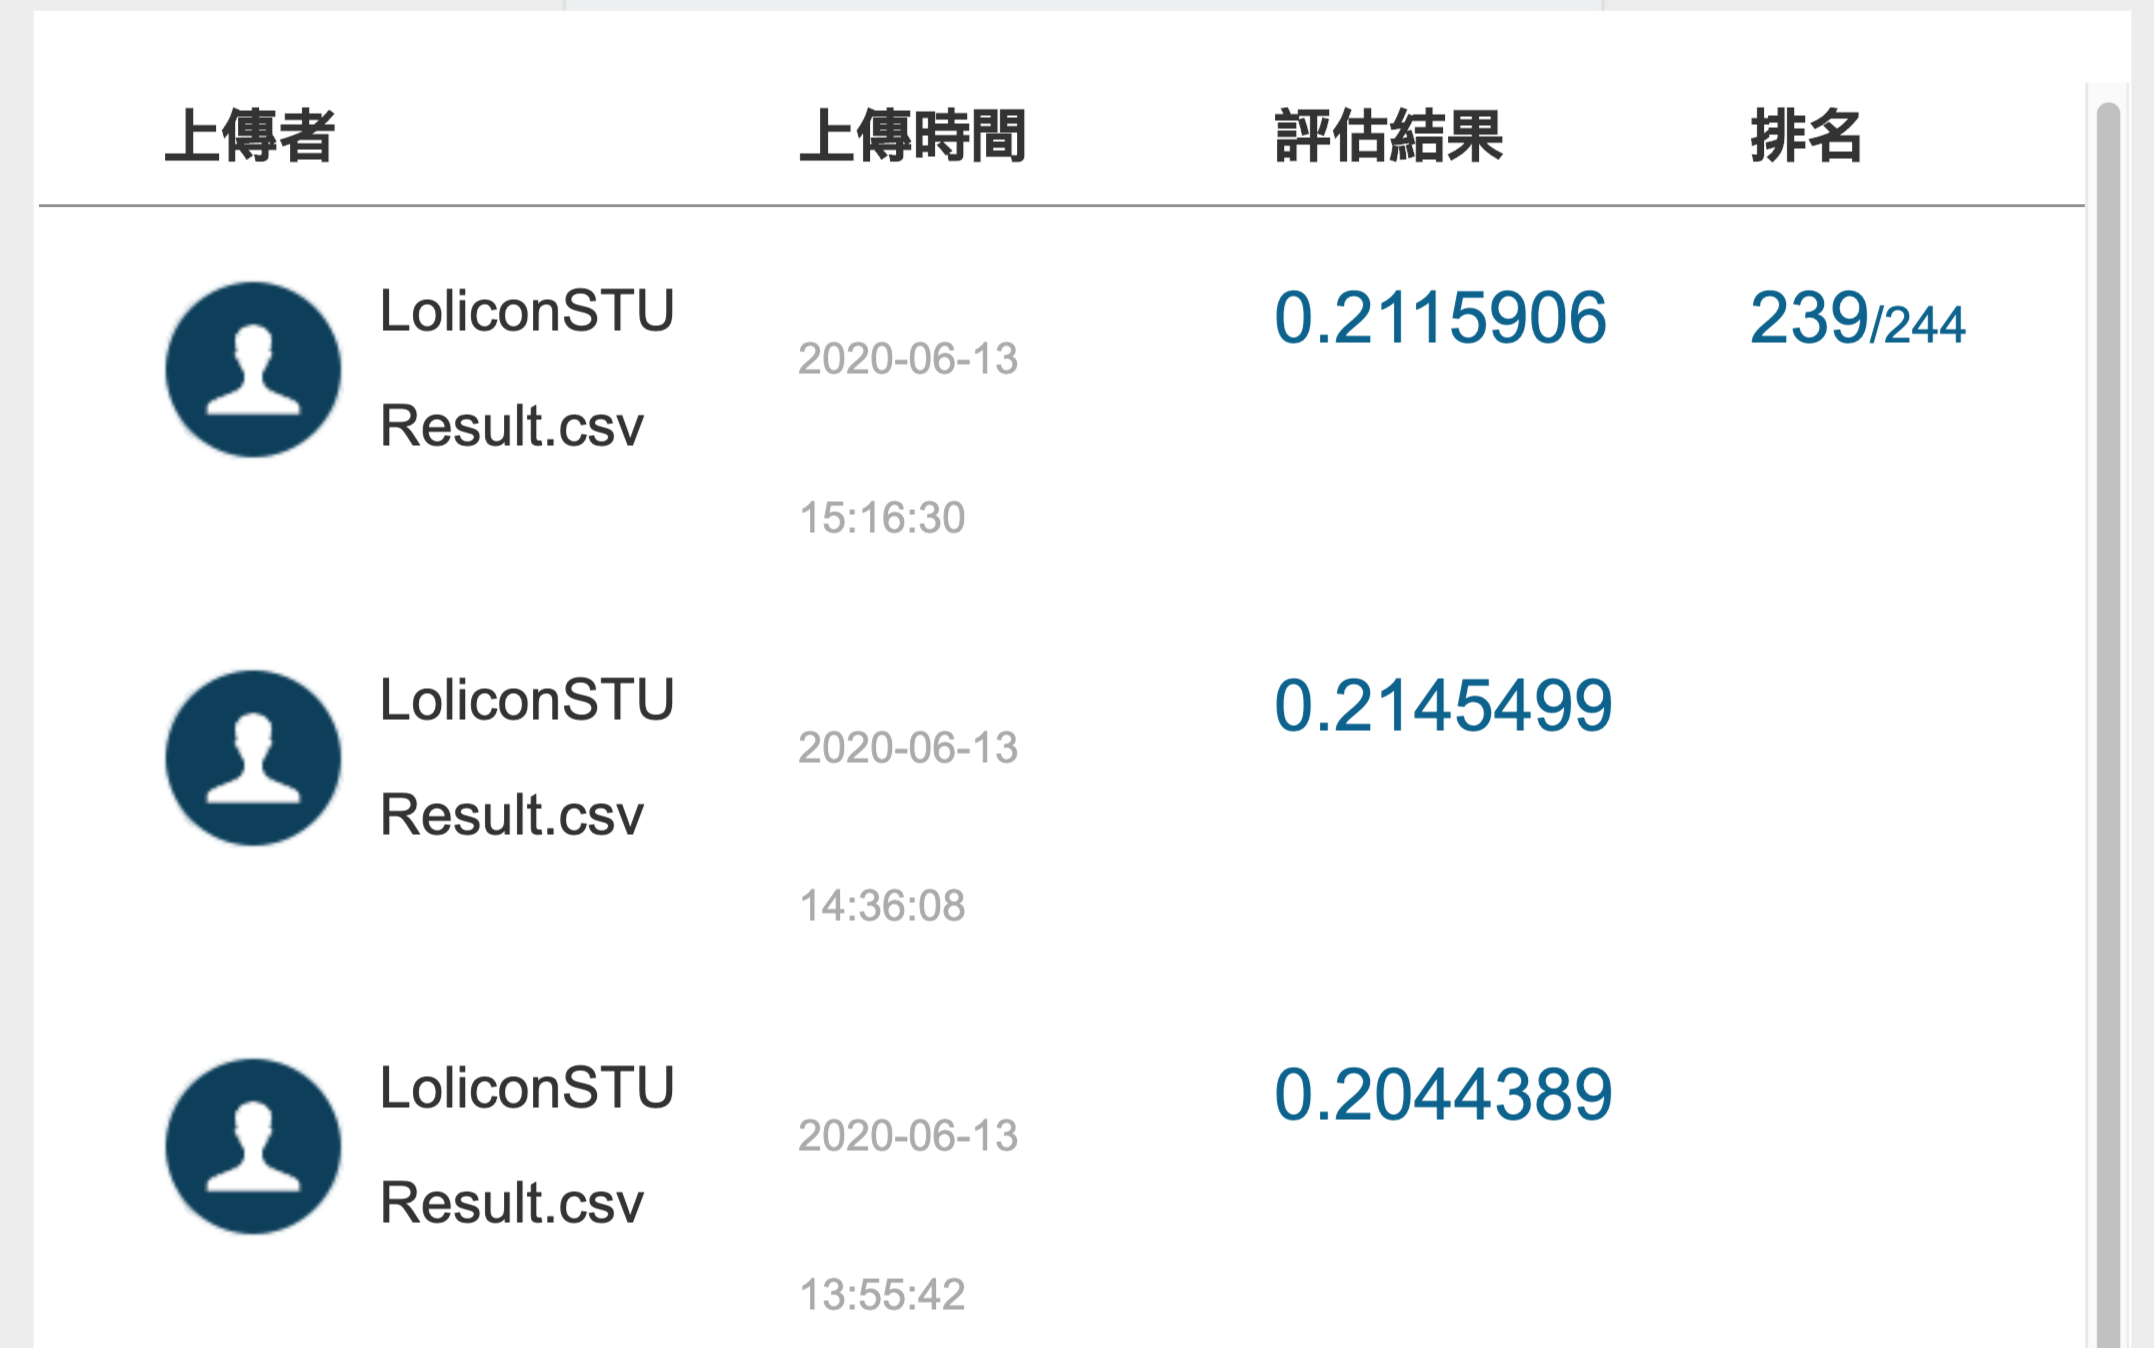

In [16]:
# 呵呵
# 沒法用 >>> 整個預處理都要換掉。
load_img('/content/drive/My Drive/GG/AA.png')